In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_data_generators(root, img_size=(28, 28), batch_size=32, split=[0.9, 0.05, 0.05]):
    # Initialize ImageDataGenerators
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=split[1] + split[2]  # combined validation + test split
    )
    
    # Create generators
    train_generator = datagen.flow_from_directory(
        directory=root,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='grayscale',  # Grayscale images
        subset='training',
        class_mode='sparse'
    )
    
    val_generator = datagen.flow_from_directory(
        directory=root,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='grayscale',  # Grayscale images
        subset='validation',
        class_mode='sparse'
    )
    
    test_generator = datagen.flow_from_directory(
        directory=root,
        target_size=img_size,
        batch_size=1,
        color_mode='grayscale',  # Grayscale images
        subset='validation',
        class_mode='sparse'
    )
    
    return train_generator, val_generator, test_generator

# Example usage
root = r"C:\Users\bedir\AI_PROJECTS\SUDOKU_SOLVER\SUDOKU_SOLVER\Model\data\assets"
img_size = (28, 28)
batch_size = 32

train_gen, val_gen, test_gen = get_data_generators(root=root, img_size=img_size, batch_size=batch_size)

# Print number of batches
print("Number of training batches:", len(train_gen))
print("Number of validation batches:", len(val_gen))
print("Number of test batches:", len(test_gen))

# Print class names
print("Class names:", train_gen.class_indices)


Found 5672 images belonging to 10 classes.
Found 627 images belonging to 10 classes.
Found 627 images belonging to 10 classes.
Number of training batches: 178
Number of validation batches: 20
Number of test batches: 627
Class names: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
def create_sudoku_cnn_model():
    model = Sequential()
    
    # İlk Konvolüsyon Katmanı
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    #(26,26,32)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #(13,13,32)

    # İkinci Konvolüsyon Katmanı
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    #(11,11,64)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #(5,5,64)
    
    # Üçüncü Konvolüsyon Katmanı
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    #(3,3,128)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #(2,2,128)
    
    # Düzleştirme ve Yoğun Katmanlar
    model.add(Flatten())
    #2*2*128 = 512
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))  # 10 sınıf için çıkış katmanı
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
model = create_sudoku_cnn_model()

history = model.fit(
    train_gen,
    epochs=25,
    validation_data=val_gen
)

test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Accuracy: {test_acc}')


c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.2708 - loss: 1.9799 - val_accuracy: 0.6603 - val_loss: 1.0268
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7175 - loss: 0.7633 - val_accuracy: 0.8612 - val_loss: 0.4675
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8699 - loss: 0.3725 - val_accuracy: 0.8963 - val_loss: 0.3289
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9173 - loss: 0.2403 - val_accuracy: 0.9027 - val_loss: 0.2660
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9440 - loss: 0.1674 - val_accuracy: 0.9203 - val_loss: 0.2188
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9536 - loss: 0.1396 - val_accuracy: 0.9426 - val_loss: 0.1628
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9693 - loss: 0.0999 - val_accuracy: 0.9490 - val_loss: 0.1436
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9648 - loss: 0.1106 - val_accuracy: 0.966

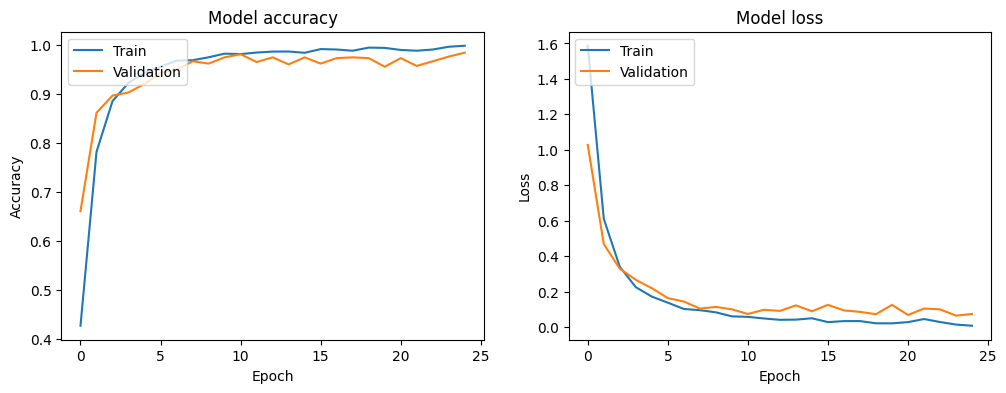

In [5]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Plot the training history
plot_training_history(history)


In [6]:
def save_model(model, path):
    model.save(path)
    print(f"Model saved to {path}")

In [7]:
save_path = r'C:\Users\bedir\Models\model_deneme.h5'
save_model(model, save_path)


Model saved to C:\Users\bedir\Models\model_deneme.h5


In [4]:
from tensorflow.keras.models import load_model

model_path = r'C:\Users\bedir\Models\model_deneme.h5'

model = load_model(model_path)

test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Accuracy: {test_acc:.2f}')




 44/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 0.0459    

c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9807 - loss: 0.1053
Test Accuracy: 0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


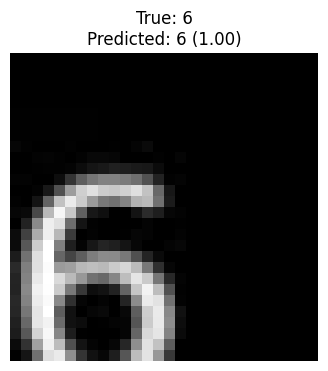

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


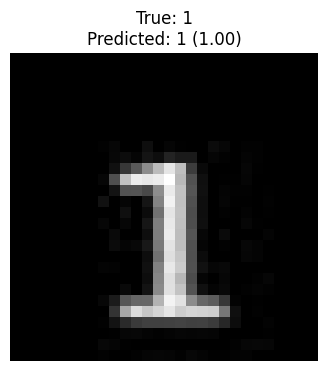

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


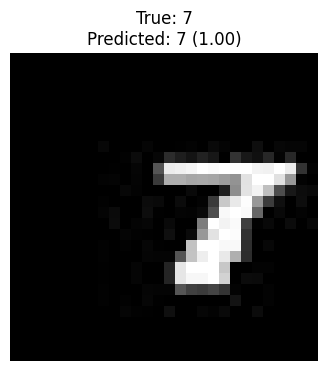

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


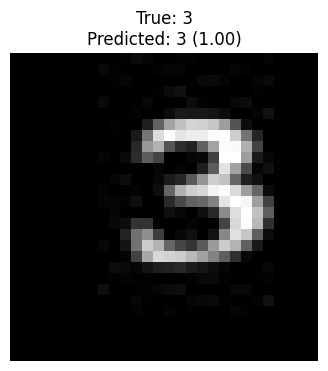

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


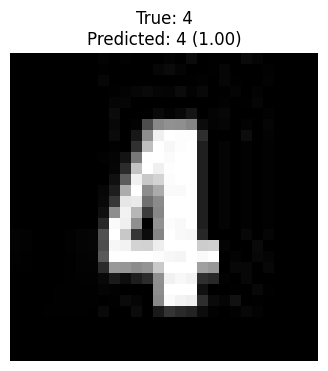

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(model, test_generator, class_names, threshold=0.8, num_images=5):
    test_generator.reset()  # Reset the generator to start from the beginning
    high_confidence_predictions = []  # List to store high confidence predictions
    
    for i in range(num_images):
        # Get the next test image and label
        img, label = next(test_generator)  # Use next() to get the next batch of images and labels
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        confidence = prediction[0][predicted_label]  # Get the confidence of the predicted class
        
        # Append to the list if the confidence is above the threshold
        if confidence >= threshold:
            high_confidence_predictions.append((img, class_names[int(label[0])], class_names[predicted_label], confidence))
        
        plt.figure(figsize=(4, 4))
        plt.imshow(img[0].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[int(label[0])]}\nPredicted: {class_names[predicted_label]} ({confidence:.2f})")
        plt.axis('off')
        plt.show()
    
    return high_confidence_predictions

# Visualize a few predictions
high_conf_preds = visualize_predictions(model, test_gen, list(train_gen.class_indices.keys()), threshold=0.8, num_images=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


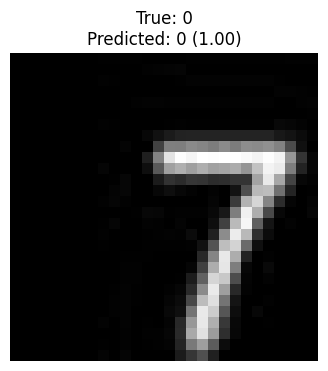

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


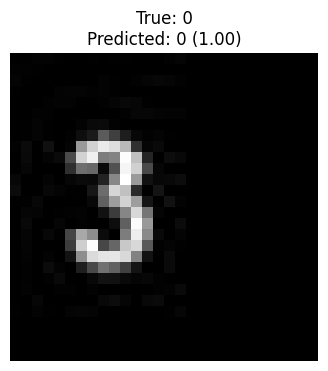

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


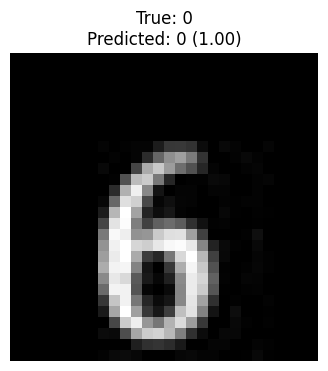

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


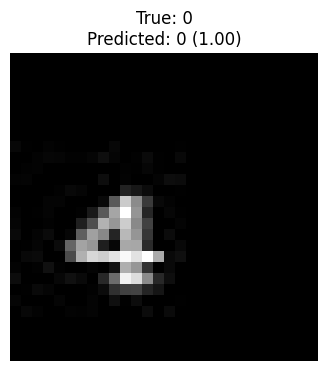

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


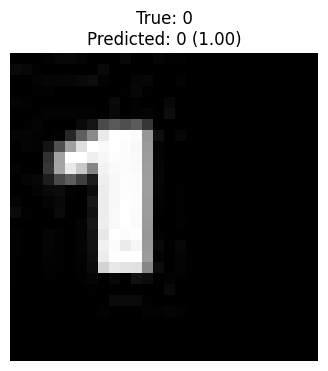

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_prediction(image, model, threshold=0.8):
    ## PREPARE IMAGE
    img = np.asarray(image)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    
    ## GET PREDICTION
    predictions = model.predict(img)
    classIndex = np.argmax(predictions, axis=-1)  # Get the index of the max probability
    probabilityValue = np.max(predictions)        # Get the max probability value
    
    ## RETURN RESULTS
    if probabilityValue > threshold:
        return classIndex[0], probabilityValue
    else:
        return 0, probabilityValue

def visualize_predictions(model, test_generator, class_names, threshold=0.8, num_images=5):
    high_confidence_predictions = []  # List to store high confidence predictions
    
    test_generator.reset()  # Reset the generator to start from the beginning

    for i in range(num_images):
        # Get the next test image and label
        img, label = next(test_generator)
        img = img[0]  # Extract the single image from the batch
        
        # Get the prediction for the current image
        classIndex, confidence = get_prediction(img, model, threshold)
        
        # Append to the list if the confidence is above the threshold
        if confidence >= threshold:
            high_confidence_predictions.append((img, class_names[classIndex], confidence))
        
        # Visualize the prediction
        plt.figure(figsize=(4, 4))
        plt.imshow(img.squeeze(), cmap='gray')  # Directly use the grayscale image
        plt.title(f"True: {class_names[np.argmax(label)]}\nPredicted: {class_names[classIndex]} ({confidence:.2f})")
        plt.axis('off')
        plt.show()
    
    return high_confidence_predictions

# Example usage
# Assuming model is your trained model and class_names is the list of class names
high_conf_preds = visualize_predictions(model, test_gen, list(train_gen.class_indices.keys()), threshold=0.8, num_images=5)


In [11]:
import numpy as np

def get_predictions_and_labels(model, test_generator, class_names, threshold=0.8, num_images=5):
    test_generator.reset()  # Reset the generator to start from the beginning

    high_confidence_predictions = []  # List to store high confidence predictions
    true_labels = []  # List to store true labels
    
    for _ in range(num_images):
        # Get the next test image and label
        img, label = next(test_generator)  # Use next() to get the next batch of images and labels
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        confidence = prediction[0][predicted_label]  # Get the confidence of the predicted class
        
        # Append to the lists if the confidence is above the threshold
        if confidence >= threshold:
            high_confidence_predictions.append((predicted_label))
            true_labels.append(int(label[0]))
    
    return high_confidence_predictions, true_labels

# Example usage
# Assuming model is your trained model and class_names is the list of class names
high_conf_preds, true_labels = get_predictions_and_labels(model, test_gen, list(train_gen.class_indices.keys()), threshold=0.8, num_images=5)

# Print the results
print("High confidence predictions:", high_conf_preds)
print("True labels:", true_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
High confidence predictions: [2, 4, 5, 9, 0]
True labels: [2, 4, 5, 9, 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


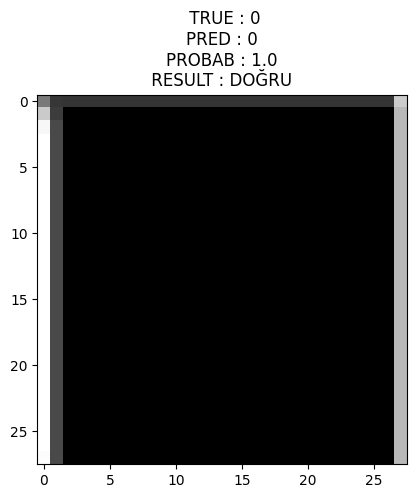

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


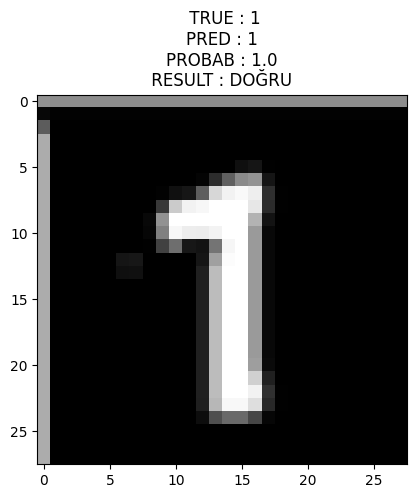

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


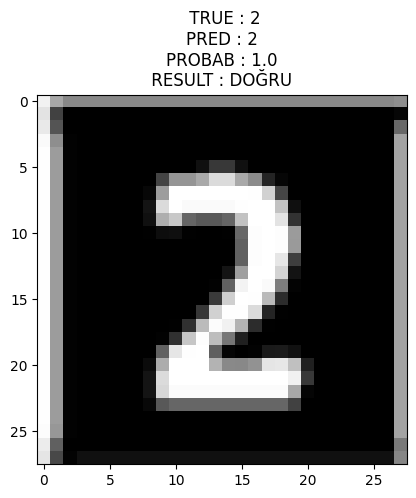

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


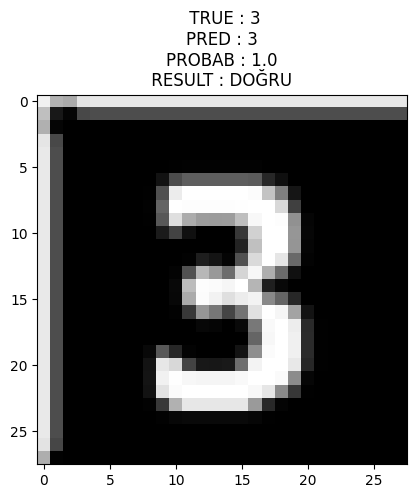

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


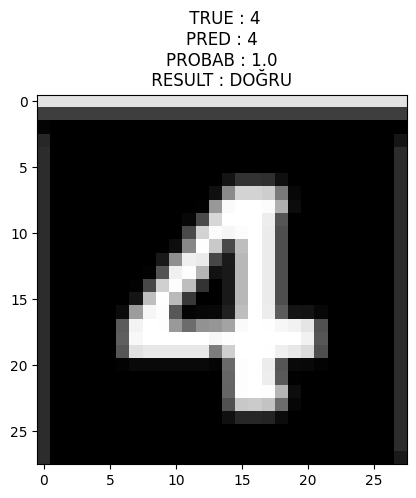

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


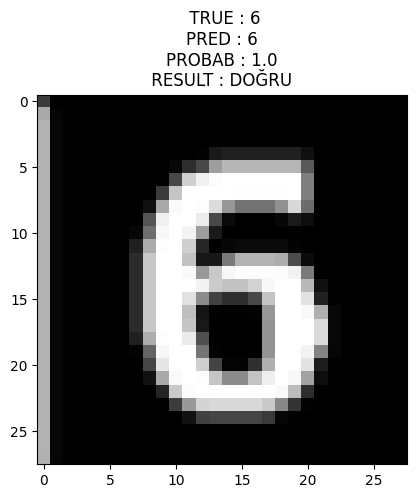

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


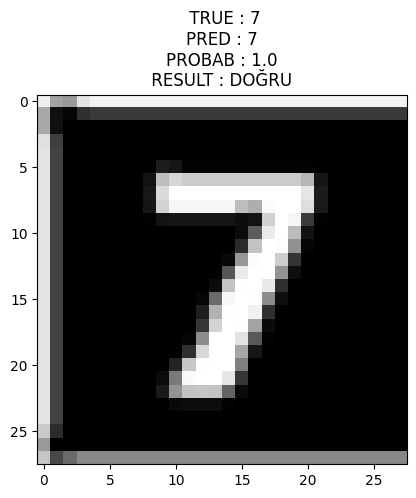

High confidence predictions: [0, 1, 2, 3, 4, 6, 7]
True labels: [0, 1, 2, 3, 4, 6, 7]


In [19]:
import os
import cv2
import numpy as np

def get_predictions_and_labels_from_directory(model, image_dir, class_names, image_size=(28, 28), threshold=0.8, num_images=7):
    high_confidence_predictions = []  # List to store high confidence predictions
    true_labels = []  # List to store true labels

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
    selected_images = image_files[:num_images]  # Limit to the first 'num_images' files

    for image_file in selected_images:
        # Load and preprocess the image
        img_path = os.path.join(image_dir, image_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
        
        # Normalize the image
        img = img / 255.0
        
        # Resize and reshape the image
        img = cv2.resize(img, image_size)
        img = img.reshape(1, image_size[0], image_size[1], 1)  # Add batch dimension and channel
        
        true_label = int(image_file.split('.')[0])
       

        # Make prediction
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        confidence = prediction[0][predicted_label]  # Get the confidence of the predicted class
        
        plt.imshow(img[0], cmap='gray')  # img[0] because img is likely shaped as (1, 28, 28, 1) or (1, 28, 28)
        result = "DOĞRU" if predicted_label == true_label else "YANLIŞ"
        plt.title(f" TRUE : {true_label}\nPRED : {predicted_label}\nPROBAB : {confidence}\n RESULT : {result} ")
        plt.show()
        
        # Append to the lists if the confidence is above the threshold
        if confidence >= threshold:
            high_confidence_predictions.append(predicted_label)
            true_labels.append(true_label)

    return high_confidence_predictions, true_labels

# Example usage
# Assuming model is your trained model and class_names is the list of class names
image_directory = r"C:\Users\bedir\AI_PROJECTS\SUDOKU_SOLVER\SUDOKU_SOLVER\Model\test_images"
high_conf_preds, true_labels = get_predictions_and_labels_from_directory(model, image_directory, list(train_gen.class_indices.keys()))

# Print the results
print("High confidence predictions:", high_conf_preds)
print("True labels:", true_labels)
